In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from PIL import Image
from scipy.stats import skew
from matplotlib.transforms import Bbox

In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\91998\Downloads\reduced_dataset.csv")

In [5]:
df.shape

(110096, 12)

In [6]:
df.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,14:11:29,2022-10-10,3820484565,5883261551,1716.14,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,18:28:00,2022-10-14,3579563922,3266488847,8161.75,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_Out
2,08:11:42,2022-10-11,5747779860,1160736320,9964.69,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
3,03:19:17,2022-10-11,4292455756,9867192015,4505.24,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Fan_Out
4,11:51:43,2022-10-08,7369150381,5460360634,1826.29,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Group


In [7]:
df.tail()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
110091,23:54:21,2022-10-13,355588972,1043455898,610.95,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
110092,18:26:36,2022-10-07,2661600778,2689801354,5515.91,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
110093,10:46:23,2022-10-08,2127087416,3319540511,5951.78,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
110094,22:58:29,2022-10-10,4449353925,2614401554,11462.14,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Fan_In
110095,12:24:34,2022-10-08,1967087462,3529992395,36855.80,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In


### Exploratory Data Analysis 

In [8]:
# number of transactions per payment type
transactions_per_payment_type = df['Payment_type'].value_counts()

# number of laundering transactions per payment type
laundering_transactions_per_payment_type = df[df['Is_laundering'] == 1].groupby('Payment_type').size()

transactions_per_payment_type, laundering_transactions_per_payment_type

(Payment_type
 Debit card         23656
 ACH                23508
 Credit card        23179
 Cheque             22973
 Cross-border       10546
 Cash Withdrawal     3494
 Cash Deposit        2740
 Name: count, dtype: int64,
 Payment_type
 ACH                18
 Cash Deposit       20
 Cash Withdrawal    17
 Cheque              9
 Credit card        18
 Cross-border       41
 Debit card         20
 dtype: int64)

In [9]:
df.describe()

,Sender_account,Receiver_account,Amount,Is_laundering
count,1.100960e+05,1.100960e+05,110096.000000,110096.000000
mean,4.986879e+09,5.058484e+09,8712.995601,0.001299
std,2.871499e+09,2.829762e+09,22910.801413,0.036017
min,9.217200e+04,4.823800e+04,8.880000,0.000000
25%,2.549614e+09,2.631937e+09,2106.365000,0.000000
50%,4.939212e+09,5.103044e+09,6111.125000,0.000000
75%,7.446318e+09,7.481269e+09,10428.785000,0.000000
max,9.999706e+09,9.999971e+09,956223.100000,1.000000


In [10]:
laundering_stats = df[df['Is_laundering'] == 1]['Amount'].agg(['max', 'mean', 'min'])

normal_stats = df[df['Is_laundering'] == 0]['Amount'].agg(['max', 'mean', 'min'])

print("Laundering Transactions Stats:\n", laundering_stats)
print("\nNormal Transactions Stats:\n", normal_stats)

Laundering Transactions Stats:
 max     105674.690000
mean      7958.757709
min         24.770000
Name: Amount, dtype: float64

Normal Transactions Stats:
 max     956223.100000
mean      8713.976529
min          8.880000
Name: Amount, dtype: float64


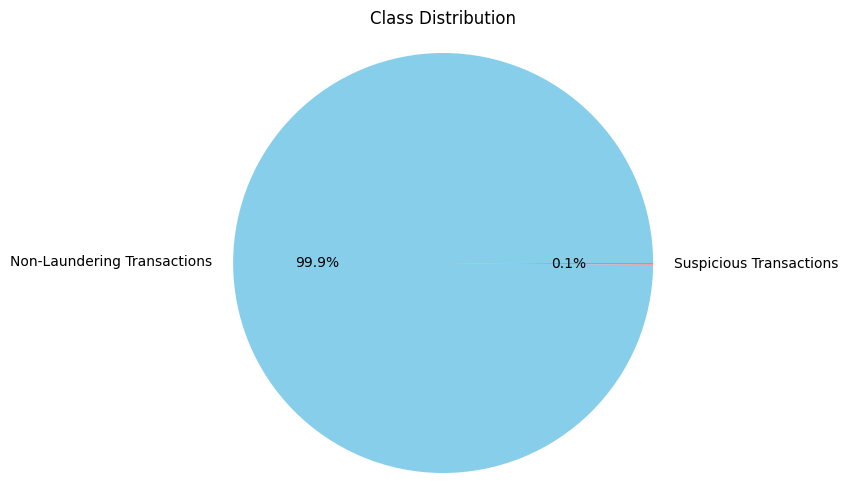

In [11]:
class_distribution = df['Is_laundering'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(class_distribution, labels=['Non-Laundering Transactions', 'Suspicious Transactions'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

plt.title('Class Distribution')
plt.axis('equal')

plt.show()

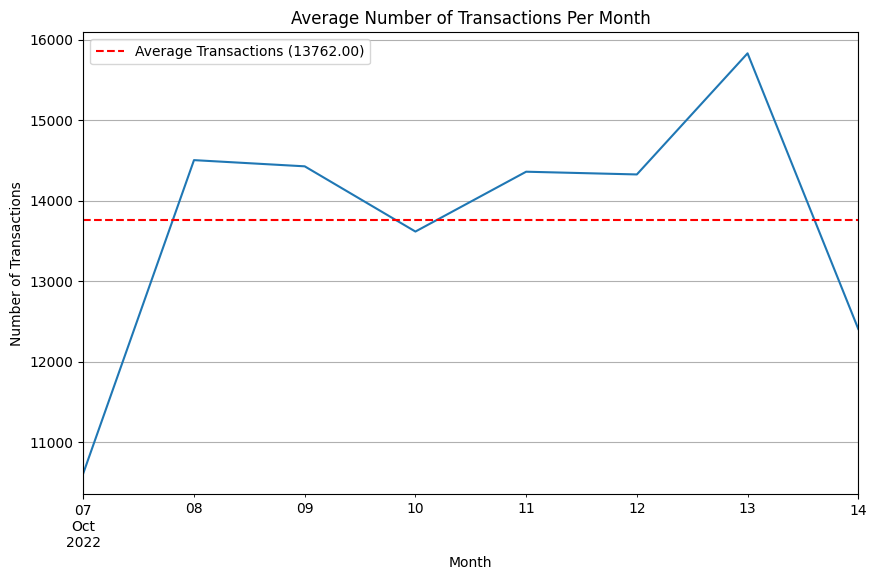

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
monthly_transactions = df.groupby(df['Date'].dt.to_period('D')).size()

# number of transactions per month
average_monthly_transactions = monthly_transactions.mean()

plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='line')
plt.axhline(y=average_monthly_transactions, color='r', linestyle='--', label=f'Average Transactions ({average_monthly_transactions:.2f})')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Average Number of Transactions Per Month')
plt.legend()
plt.grid(True)
plt.show()

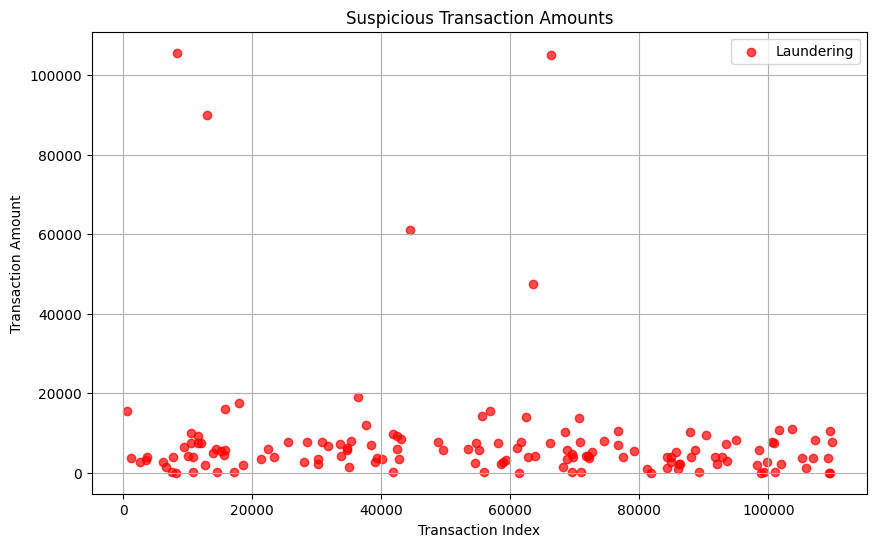

In [13]:
# Separate the data
laundering_data = df[df['Is_laundering'] == 1]
non_laundering_data = df[df['Is_laundering'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(laundering_data.index, laundering_data['Amount'], color='red', label='Laundering', alpha=0.7)

plt.title('Suspicious Transaction Amounts')
plt.xlabel('Transaction Index')
plt.ylabel('Transaction Amount')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 0, 'Number of Alerts')

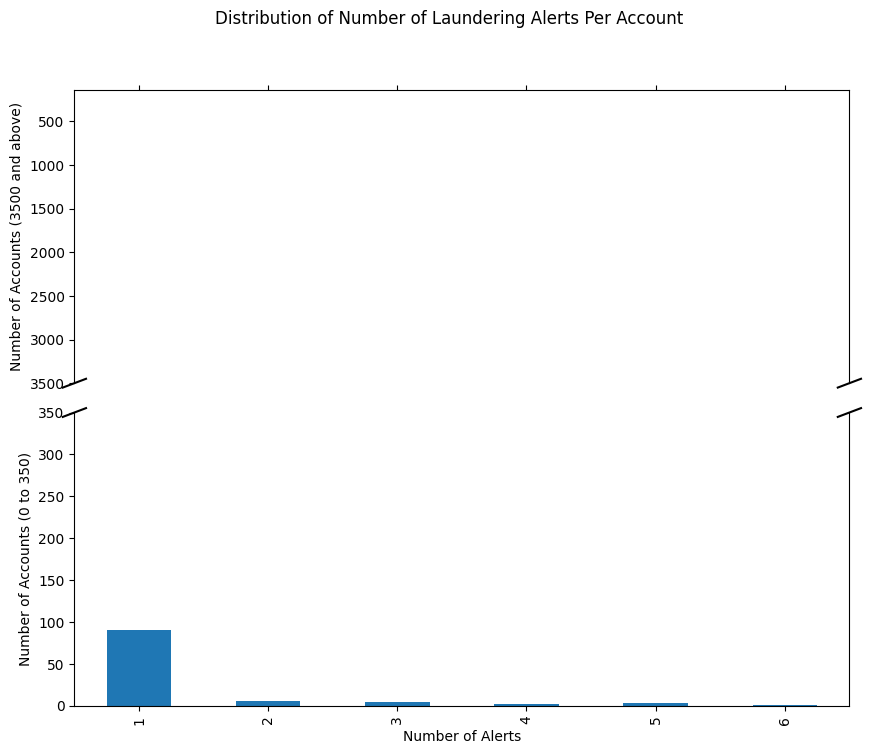

In [14]:
laundering_df = df[df['Is_laundering'] == 1]

account_alert_counts = laundering_df.groupby('Sender_account').size()
alert_distribution = account_alert_counts.value_counts()
alert_distribution = alert_distribution.sort_index()

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
fig.subplots_adjust(hspace=0.1)

alert_distribution.plot(kind='bar', ax=ax1)
alert_distribution.plot(kind='bar', ax=ax2)

fig.suptitle('Distribution of Number of Laundering Alerts Per Account')

ax1.set_ylim(3500, alert_distribution.max()+50)
ax2.set_ylim(0, 350)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

d = .015  # diagonal lines size
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

ax2.set_ylabel('Number of Accounts (0 to 350)')
ax1.set_ylabel('Number of Accounts (3500 and above)')
ax2.set_xlabel('Number of Alerts')

Original Skewness: 22.07224853389768
Log-Transformed Skewness: -1.0151132777209182


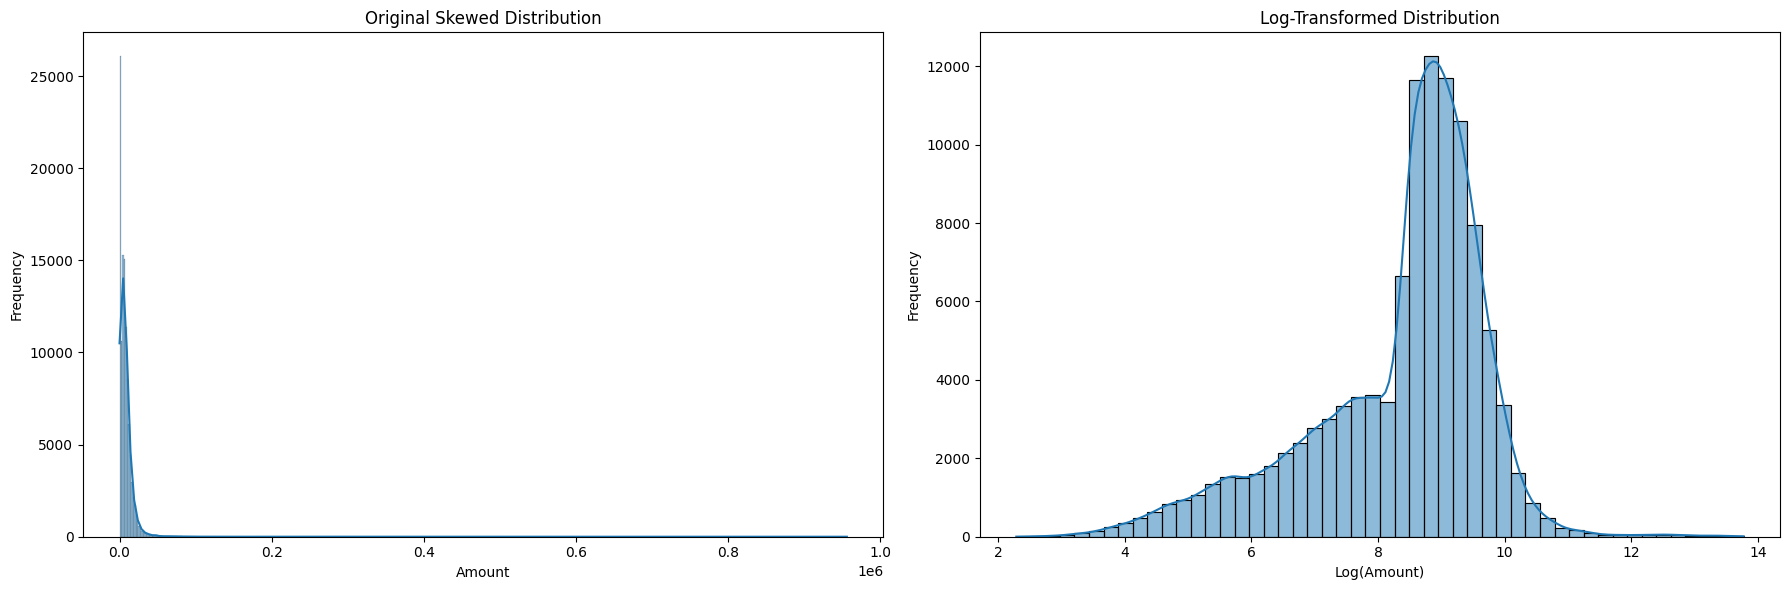

In [15]:
skewed_data = df['Amount']

original_skewness = skew(skewed_data)
print(f"Original Skewness: {original_skewness}")

# Apply a log transformation
log_transformed_data = np.log1p(skewed_data)
# skewness after log transformation
transformed_skewness = skew(log_transformed_data)
print(f"Log-Transformed Skewness: {transformed_skewness}")

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(skewed_data, bins=500, kde=True, ax=ax[0])
ax[0].set_title('Original Skewed Distribution')
ax[0].set_xlabel('Amount')
ax[0].set_ylabel('Frequency')

sns.histplot(log_transformed_data, bins=50, kde=True, ax=ax[1])
ax[1].set_title('Log-Transformed Distribution')
ax[1].set_xlabel('Log(Amount)')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [16]:
total_amount_pivot = pd.pivot_table(df, index=["Payment_type"], values='Amount', aggfunc=np.sum)
laundering_count_pivot = df[df['Is_laundering'] == 1].groupby('Payment_type').size().to_frame('Laundering_Count')
normal_count_pivot = df[df['Is_laundering'] == 0].groupby('Payment_type').size().to_frame('Normal_Count')

combined_pivot = total_amount_pivot.join([laundering_count_pivot, normal_count_pivot], how='outer')
combined_pivot = combined_pivot.fillna(0)

cm = sns.light_palette("blue", as_cmap=True)
styled_combined_pivot = combined_pivot.style.background_gradient(cmap=cm)

styled_combined_pivot

C:\Users\91998\AppData\Local\Temp\ipykernel_14864\1828936050.py:1: FutureWarning: The provided callable <function sum at 0x000001C775865B20> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_amount_pivot = pd.pivot_table(df, index=["Payment_type"], values='Amount', aggfunc=np.sum)


,Amount,Laundering_Count,Normal_Count
Payment_type,,,
ACH,214603737.622048,18,23490
Cash Deposit,5938657.320000,20,2720
Cash Withdrawal,536816.320000,17,3477
Cheque,210197875.916117,9,22964
Credit card,211548249.522377,18,23161
Cross-border,102462160.051813,41,10505
Debit card,213978466.910000,20,23636


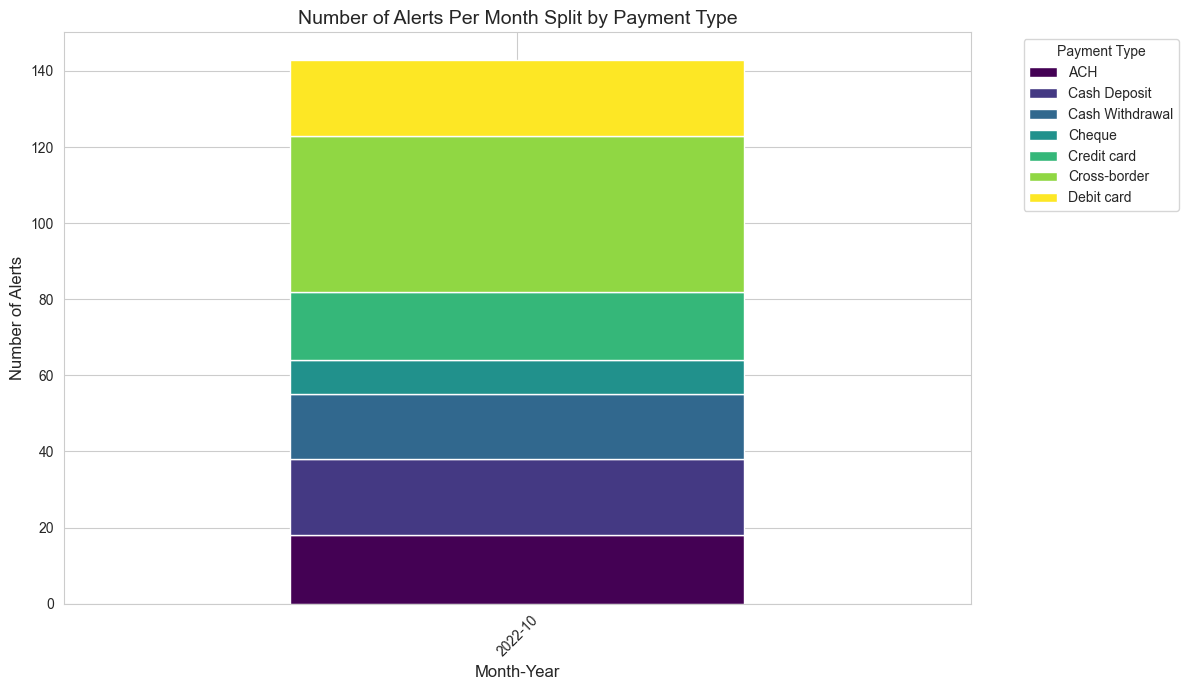

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
grouped_data = df.groupby(['Date', 'Payment_type']).agg({'Is_laundering': 'sum'}).reset_index()
grouped_data['Month_Year'] = grouped_data['Date'].dt.to_period('M')
monthly_alerts = grouped_data.groupby(['Month_Year', 'Payment_type']).agg({'Is_laundering': 'sum'}).reset_index()

pivot_data = monthly_alerts.pivot(index='Month_Year', columns='Payment_type', values='Is_laundering')

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 7))
pivot_data.plot(kind='bar', ax=ax, stacked=True, colormap='viridis')
pivot_data = monthly_alerts.pivot(index='Month_Year', columns='Payment_type', values='Is_laundering')

plt.title('Number of Alerts Per Month Split by Payment Type', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Alerts', fontsize=12)
plt.xticks(rotation=45)

plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

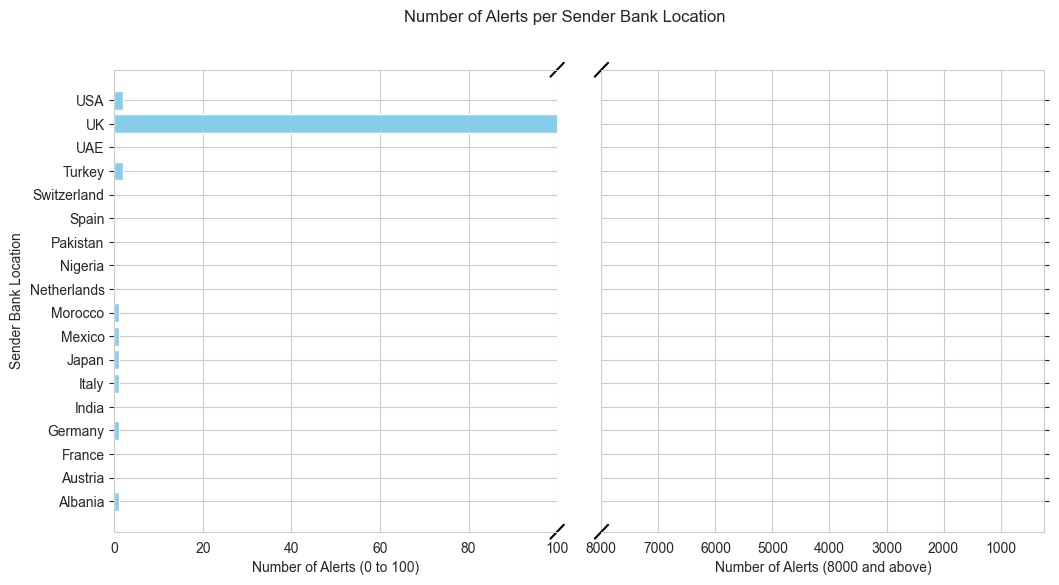

In [18]:
alerts_per_location = df.groupby('Sender_bank_location')['Is_laundering'].sum().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
fig.subplots_adjust(wspace=0.1)

ax1.barh(alerts_per_location['Sender_bank_location'], alerts_per_location['Is_laundering'], color='skyblue')
ax2.barh(alerts_per_location['Sender_bank_location'], alerts_per_location['Is_laundering'], color='skyblue')

ax1.set_xlim(0, 100)  # Set the left subplot values
ax2.set_xlim(8000, max(alerts_per_location['Is_laundering']) + 100)  # Set the right subplot values

fig.suptitle('Number of Alerts per Sender Bank Location')

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax2.yaxis.tick_right()
ax2.set_yticks([])

d = .015  # Size of diagonal lines
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (-d, +d), **kwargs)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)

ax1.set_xlabel('Number of Alerts (0 to 100)')
ax2.set_xlabel('Number of Alerts (8000 and above)')
ax1.set_ylabel('Sender Bank Location')

ax1.set_yticks(range(len(alerts_per_location['Sender_bank_location'])))
ax1.set_yticklabels(alerts_per_location['Sender_bank_location'])

plt.show()

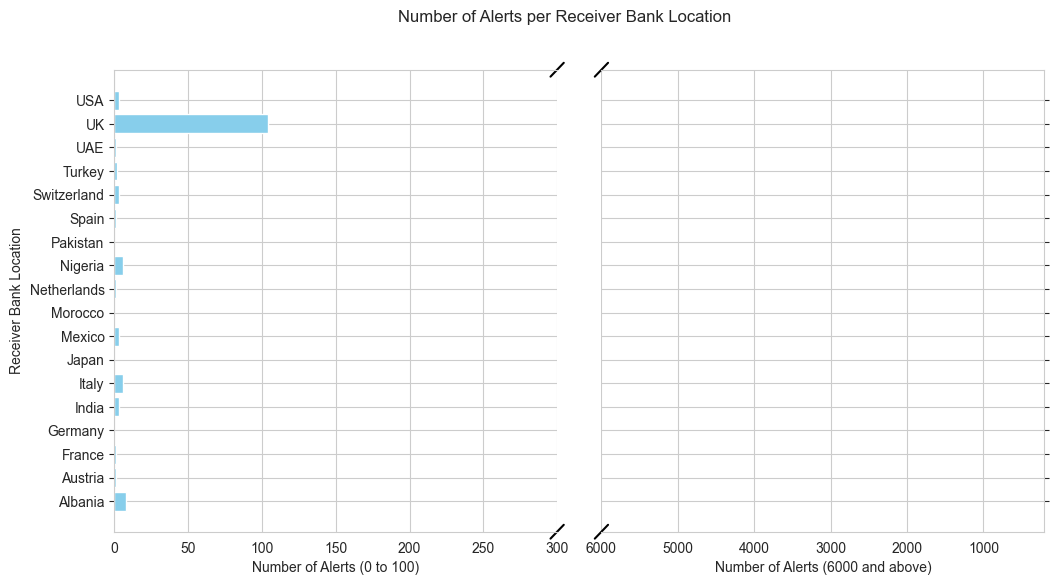

In [19]:
alerts_per_location = df.groupby('Receiver_bank_location')['Is_laundering'].sum().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
fig.subplots_adjust(wspace=0.1)  # Adjust the spacing between subplots

ax1.barh(alerts_per_location['Receiver_bank_location'], alerts_per_location['Is_laundering'], color='skyblue')
ax2.barh(alerts_per_location['Receiver_bank_location'], alerts_per_location['Is_laundering'], color='skyblue')

ax1.set_xlim(0, 300)  # Set the left subplot values
ax2.set_xlim(6000, max(alerts_per_location['Is_laundering']) + 100)  # Set the right subplot values

fig.suptitle('Number of Alerts per Receiver Bank Location')

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax2.yaxis.tick_right()
ax2.set_yticks([])

d = .015  # Size of diagonal lines
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (-d, +d), **kwargs)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)

ax1.set_xlabel('Number of Alerts (0 to 100)')
ax2.set_xlabel('Number of Alerts (6000 and above)')
ax1.set_ylabel('Receiver Bank Location')

ax1.set_yticks(range(len(alerts_per_location['Receiver_bank_location'])))
ax1.set_yticklabels(alerts_per_location['Receiver_bank_location'])

plt.show()

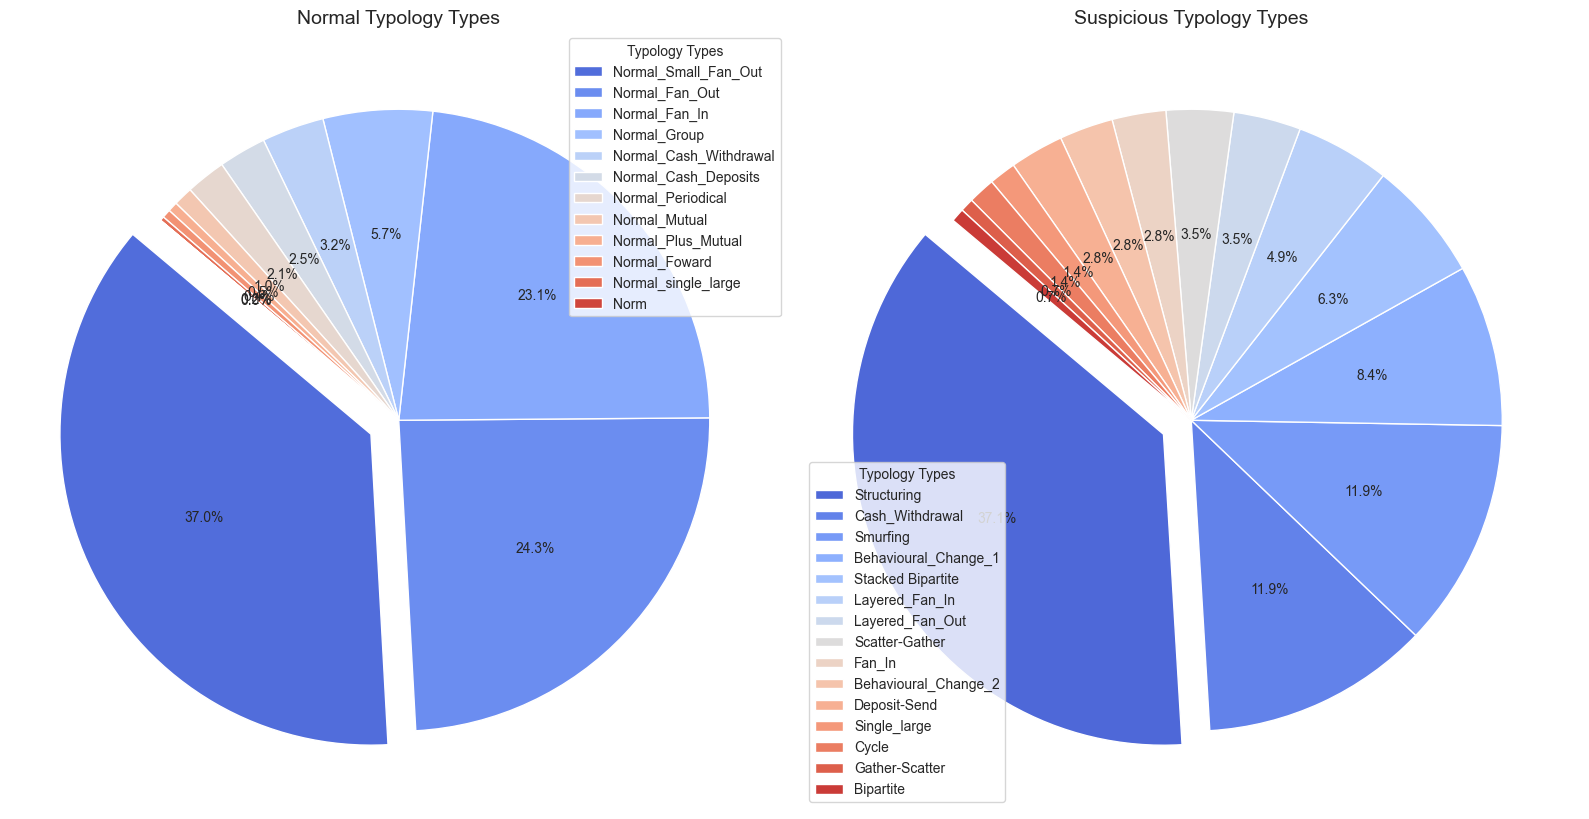

In [20]:
normal_data = df[df['Is_laundering'] == 0]['Laundering_type'].value_counts()
laundering_data = df[df['Is_laundering'] == 1]['Laundering_type'].value_counts()

# palette_normal = sns.color_palette("husl", len(normal_data))
palette_normal = sns.color_palette("coolwarm", len(normal_data))
palette_laundering = sns.color_palette("coolwarm", len(laundering_data))

fig, axs = plt.subplots(1, 2, figsize=(16, 10))

explode_normal = [0.1] + [0] * (len(normal_data) - 1)
explode_laundering = [0.1] + [0] * (len(laundering_data) - 1)

patches, texts, autotexts = axs[0].pie(normal_data, explode=explode_normal, autopct='%1.1f%%', colors=palette_normal, startangle=140)
axs[0].set_title('Normal Typology Types', fontsize=14)
axs[0].legend(patches, normal_data.index, loc='best', title="Typology Types", fontsize=10)

patches, texts, autotexts = axs[1].pie(laundering_data, explode=explode_laundering, autopct='%1.1f%%', colors=palette_laundering, startangle=140)
axs[1].set_title('Suspicious Typology Types', fontsize=14)
axs[1].legend(patches, laundering_data.index, loc='best', title="Typology Types", fontsize=10)

for text in texts + autotexts:
  text.set_fontsize(10)

plt.tight_layout()
plt.show()

In [21]:
df = pd.read_csv(r"C:\Users\91998\Downloads\reduced_dataset.csv")

## Pre-Processing the Data

In [22]:
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

df['Date_Year'] = pd.to_datetime(df['Date']).dt.year
df['Date_Month'] = pd.to_datetime(df['Date']).dt.month
df['Date_Day'] = pd.to_datetime(df['Date']).dt.day

df.drop(columns=['Laundering_type'], inplace=True)
df.drop(columns=['Time', 'Date'], inplace=True)


C:\Users\91998\AppData\Local\Temp\ipykernel_14864\2383917675.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


In [23]:
skewed_data = df['Amount']
original_skewness = skew(skewed_data)
print(f"Original Skewness: {original_skewness}")

log_transformed_data = np.log1p(skewed_data)
transformed_skewness = skew(log_transformed_data)
print(f"Log-Transformed Skewness: {transformed_skewness}")

df['Amount'] = log_transformed_data

Original Skewness: 22.07224853389768
Log-Transformed Skewness: -1.0151132777209182


In [24]:
categorical_cols = ['Sender_account', 'Receiver_account', 'Payment_currency', 'Received_currency',
                   'Sender_bank_location', 'Receiver_bank_location', 'Payment_type',
                   'Date_Year', 'Date_Month', 'Date_Day']

for col in categorical_cols:
    encoder = preprocessing.LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

numerical_cols = ['Hour', 'Amount']

scaler = preprocessing.StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Hour,Date_Year,Date_Month,Date_Day
0,9944,31234,-0.634783,10,10,16,16,1,0,-0.049857,0,0,3
1,9316,17159,0.476960,10,10,16,16,0,0,0.667883,0,0,7
2,15021,6083,0.619281,10,10,16,16,0,0,-1.126469,0,0,4
3,11213,52553,0.053265,10,10,16,16,3,0,-2.023645,0,0,4
4,19223,28929,-0.590444,10,10,16,16,6,0,-0.588163,0,0,1


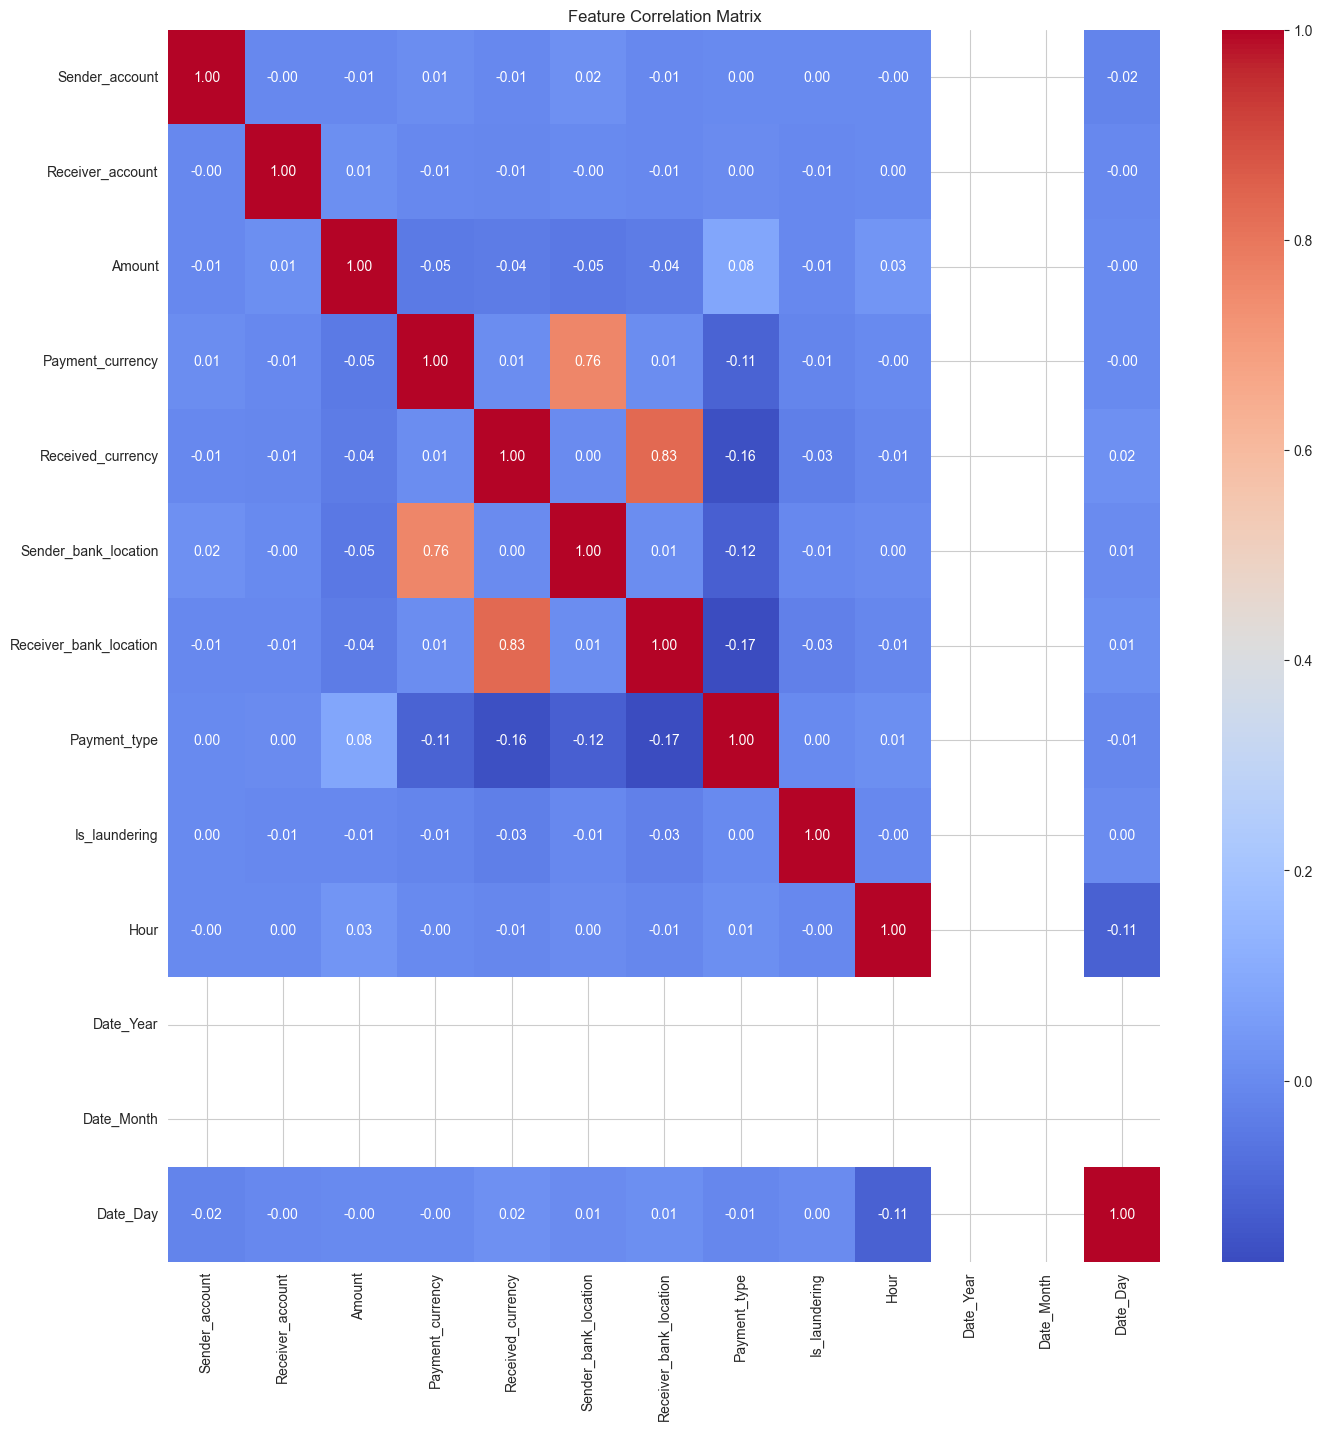

In [25]:
correlation_matrix = df.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Feature Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

## Split the Data

In [26]:
X = df.drop(columns=['Is_laundering'])
y = df['Is_laundering']

In [27]:
total_size = len(df)
train_size = int(0.8 * total_size)
test_and_validation_size = total_size - train_size
test_size = int(0.5 * test_and_validation_size)
validation_size = test_and_validation_size - test_size

X_train = X[:train_size]
y_train = y[:train_size]

X_validation = X[train_size:train_size+test_size]
y_validation = y[train_size:train_size+test_size]

X_test = X[train_size+test_size:]
y_test = y[train_size+test_size:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_validation.shape, y_validation.shape)


(88076, 12) (88076,) (11010, 12) (11010,) (11010, 12) (11010,)


## XGB Classifier Experiment

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
     #'max_depth': [4,8,1],
     #'eta': [0.1,0.2,0.3,0.4],
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=2,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

val_predictions = best_model.predict_proba(X_validation)[:, 1]
val_auc = roc_auc_score(y_validation, val_predictions)
print("Validation AUC: ", val_auc)

test_predictions = best_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_predictions)
print("Test AUC: ", test_auc)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


c:\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:04:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END .................................................... total time=   0.2s


c:\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:04:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END .................................................... total time=   0.2s


c:\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:04:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters:  {}
Validation AUC:  0.8586030793477601
Test AUC:  0.8925091368303893


Test Set AUC:  0.8925091368303893


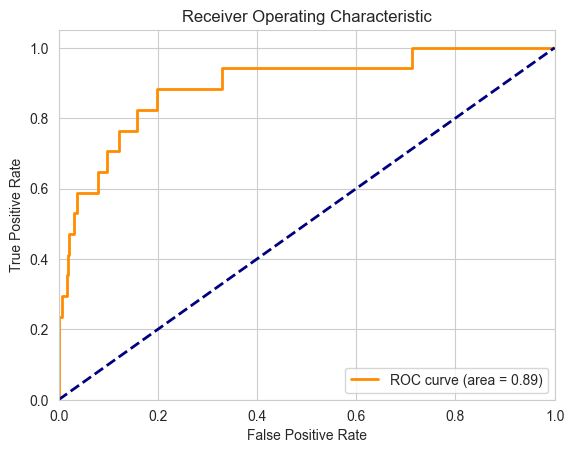

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

test_probabilities = best_model.predict_proba(X_test)[:, 1]

test_auc = roc_auc_score(y_test, test_probabilities)
print("Test Set AUC: ", test_auc)

fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % test_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Desired TPR of around 90%:


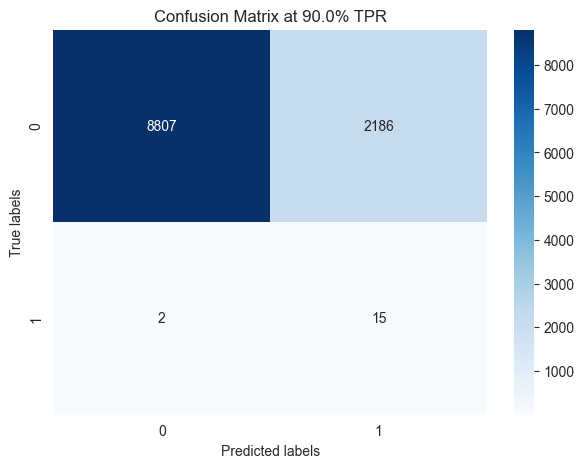

False Positive Rate (FPR): 0.199
True Positive Rate (TPR): 0.882


In [30]:
# Confusion Matrix, TPR, and FPR at around a TPR of 0.9
desired_tpr = 0.9
closest_threshold = thresholds[np.argmin(np.abs(tpr - desired_tpr))]
print(f"Desired TPR of around 90%:")

y_pred = (test_probabilities >= closest_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix at {desired_tpr*100}% TPR')
plt.show()

tn, fp, fn, tp = cm.ravel()
fpr_cm = fp / (fp + tn)
tpr_cm = tp / (tp + fn)

print(f"False Positive Rate (FPR): {fpr_cm:.3f}")
print(f"True Positive Rate (TPR): {tpr_cm:.3f}")

In [31]:
import joblib

# Save the model to a file
model_filename = 'xgbreduced_model.pkl'
joblib.dump(best_model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to xgbreduced_model.pkl


In [32]:
# Load the model from the file
loaded_model = joblib.load(model_filename)
print("Model loaded successfully.")

Model loaded successfully.


In [40]:
# Example of new data
new_data = pd.DataFrame({
    'Sender_account': ['7401327478'],
    'Receiver_account': ['4336451277'],
    'Amount': [2603.3],
    'Payment_currency': ['UK pounds'],
    'Received_currency': ['UK pounds'],
    'Sender_bank_location': ['UK'],
    'Receiver_bank_location': ['UK'],
    'Payment_type': ['Cash Deposit'],
    'Hour': [10],
    'Date_Year': [2022],
    'Date_Month': [10],
    'Date_Day': [7]
})

# Preprocess the new data
new_data['Amount'] = np.log1p(new_data['Amount'])  # Apply log transformation

# Use pd.factorize to handle unseen labels
new_data['Sender_account'] = pd.factorize(new_data['Sender_account'])[0]
new_data['Receiver_account'] = pd.factorize(new_data['Receiver_account'])[0]
new_data['Payment_currency'] = pd.factorize(new_data['Payment_currency'])[0]
new_data['Received_currency'] = pd.factorize(new_data['Received_currency'])[0]
new_data['Sender_bank_location'] = pd.factorize(new_data['Sender_bank_location'])[0]
new_data['Receiver_bank_location'] = pd.factorize(new_data['Receiver_bank_location'])[0]
new_data['Payment_type'] = pd.factorize(new_data['Payment_type'])[0]

# Scale the numerical features
new_data[numerical_cols] = scaler.transform(new_data[numerical_cols])

In [41]:
from sklearn.preprocessing import OneHotEncoder

# Fit the OneHotEncoder on the training data
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train[categorical_cols])

# Transform the new data
new_data_encoded = encoder.transform(new_data[categorical_cols]).toarray()

# Combine the encoded features with the numerical features
new_data_final = np.hstack((new_data_encoded, new_data[numerical_cols].values))

In [42]:
# Make predictions
predictions = loaded_model.predict(new_data)
predicted_probabilities = loaded_model.predict_proba(new_data)[:, 1]

print("Predictions:", predictions)
print("Predicted Probabilities:", predicted_probabilities)

Predictions: [0]
Predicted Probabilities: [0.00648774]
